In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:


!pip install wordcloud --upgrade --quiet

!pip install plotly_express --upgrade --quiet

     |████████████████████████████████| 366 kB 5.1 MB/s 


In [5]:
!pip install emoji  --upgrade --quiet

     |████████████████████████████████| 184 kB 5.1 MB/s 


In [6]:
from datetime import datetime as dt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # visualization
import seaborn as sns #visualization
%matplotlib inline
sns.set()
import regex as re
import re

import os
import emoji
from collections import Counter
# from PIL import image 
from  wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px

In [7]:
#To read the text file
whtasapp_df = pd.read_fwf("_chat.txt", header= None )

In [ ]:
whtasapp_df.head(5) 

,0,1,2,3,4,5,6,7,8
0,"[3/4/19, 8:42:11 PM] 1# WHOLE LIFE FOUNDATION:...",one outside of,"this chat, not even WhatsApp,",can,read,or,listen,to,them.
1,"[3/4/19, 8:42:11 PM] ‎‪+234 706 973 3917‬ crea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[3/29/21, 8:30:39 PM] ‎You joined using this g...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[3/29/21, 8:31:00 PM] ‪+234 810 679 0200‬: Wow",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Awesome💃💃,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
whtasapp_df.columns



Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [ ]:
whtasapp_df[int(0)].head(5)

Now, we need to know how a typical line is written from that text file.

In [91]:
f = open("_chat.txt", "r")

print(f.readline())
print(f.readline())
print(f.readline())
print(f.readline())

f.close()

[3/4/19, 8:42:11 PM] 1# WHOLE LIFE FOUNDATION: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.

[3/4/19, 8:42:11 PM] ‎‪+234 706 973 3917‬ created this group

[3/29/21, 8:30:39 PM] ‎You joined using this group's invite link

[3/29/21, 8:31:00 PM] ‪+234 810 679 0200‬: Wow



### **Observation**


*   The features need to be change. We can see the features are in numbers

*   We need to drop some nan values

*   The messages in the chat are formatted like this:

 **[3/29/21, 8:31:12 PM] ‪+234 810 679 0200‬: Evening dear**

*   We need to check if the date and time start with datetime  format, one way to check is using regular expression to match the diffeent format


*   Each Line need to be dividied into date, time, author and message


*   Extracting a typical line from the text  file, we can see some lines have numbers and some don't have. This means that they are some messages that have author while some don't have, let's note it down.


*   Not every line start with a date time. i.e some line starts with a text(Multiline mesage)

*   






A regular expression is a sequence of characters that define a search pattern. In other words: is a combination of letters, numbers and symbols we can use to search stuff within a larger text :)


In [ ]:
whtasapp_df.head(22) 

Here, from the table above, my messegaes are formattedlike this:

## **[3/29/21, 8:31:12 PM] ‪+234 810 679 0200‬: Evening dear**

Each line can be broken in specific blocks, as follows.

[{DATE}, {TIME}] {AUTHOR}:  {MESSAGE}

Now, to match the formats above we used regrex.

Now we have to check if a line starts with a date and time.

First, in order to detect if a line of text is a new message(that start with a date and  time) or belongs to a multi-line message, we will have to check if that line begins with a Date and Time, for which we will need a little bit of regular expression (regex) matching.

**NOTE**
A new message must start with date and time.

In [8]:
#To extract the date  and time
#[3/29/21, 8:31:12 PM] #writing the date and time format in a regrex pattern
def date_time(s):
  ##writing the date and time format in a regrex pattern
  pattern = '^\[([0-9]+)([/])([0-9]+)([/])([0-9]+)[,]? ([0-9]+):([0-9][0-9]):([0-9][0-9])?[ ]?(AM|PM|am|pm)?\]'
  result = re.match(pattern, s)
  if result:
    return True
  else:
    return False


From the above function, two blocks have been detected. i.e The Time and Date.

To check if there is an author field(i.e if the Author: Message exist)

In [9]:
#To check if there ia an author in the chat
# '‪+234 810 679 0200‬: Evening dear'

def get_author(s):
  s = s.split(":")
  if len(s) > 1:
    return True
  else:
    return False


from the code above, we have define the four blocks, i.e {Date} (Time} {Author}(Message}.

NOTE: once we have defined  the Date, Time and Author blocks, what we are left with is the remaining portion of the string which is the de facto Message block. That is why we were able to define  the message block.

 Extracting and Combining blocks>
 


[3/29/21, 8:31:12 PM] ‪+234 810 679 0200‬: Evening dear

We have been able to identify the Date, Time, Author and Message blocks in a single line, we have to split each line based on the Date, Time, Author and Message  like commas (,), squre bracket(]), colons(:) and spaces( ), so that the required blocks can be extracted and saved in a dataframe.



Date{Comma }Time{rightsquarebracket }Author{Colon }Message

[18/06/17{, }22:47 PM]{] }‪+234 810 679 0200{: }Evening dear




In [10]:
def getDataPoint(line):
  splitline = line.split('] ') #['3/29/21, 8:31:12 PM', '‪+234 810 679 0200‬: Evening dear']
  dateTime = splitline[0] # dateTime = '3/29/21, 8:31:12 PM'
  date, time = dateTime.split(", ") # date = '3/29/21', time = '8:31:12 PM'
  message = ' '.join(splitline[1:]) #message = '‪+234 810 679 0200‬: Evening dear'

  if get_author(message): #True
    splitMessage = message.split(": ")     #message = ['+234 810 679 0200', ‬'Evening dear']
    author = splitMessage[0] # author = '+234 810 679 0200‬'
    message = ' '.join(splitMessage[1:]) # message = 'Evening dear'
  else:
    author = None


  if  time[5] == ":": # time = "10:30:33 PM"
    time = time[:5] + time[-3:] #  time = '10:30' + ' PM" --- 10:30 PM
  else:
    time = time[:4] + time[-3:]  
  return date, time, author, message




Now, we need to Parse  the entire file and handle  Multi-Line Messages in the file.


In [11]:

#defining all the  vaariabe we need 
data = [] #list to keep track of data
conversation = "_chat.txt"
with open(conversation, encoding="Utf-8") as fp:
  fp.readline() #skipping the first line(It do contain)
  messageBuffer = []
  date, time, author = None, None, None

  while True:
    line = fp.readline() #read each line
    if not line: #to stop if end of file has been reached.
      break
    line = line.strip() # guarding against leading or trailing whitespaces
    if date_time(line):        #if a line start with a date time format, it indicate the beginning of a message
      if len(messageBuffer) > 0: #Check if the message buffer contains characters 
        data.append([date, time, author, ' '.join(messageBuffer)]) #save the blocks from the previous message in Data
      messageBuffer.clear() #clear the message so that it can be used for  next message
      date, time, author, message = getDataPoint(line) # Identify and extract blocks from the line
      messageBuffer.append(message) # Append message to buffer
    else:
      messageBuffer.append(line) ## If a line doesn't start with a Date Time pattern, then it is part of a multi-line message. So, just append to buffer

      
    





In [12]:
df1 = pd.DataFrame(data, columns=['Date', 'Time', 'Author', 'Message'])
df1.head()


,Date,Time,Author,Message
0,[3/4/19,8:42 PM,None,‎‪+234 706 973 3917‬ created this group
1,[3/29/21,8:30 PM,None,‎You joined using this group's invite link
2,[3/29/21,8:31 PM,‪+234 810 679 0200‬,Wow Awesome💃💃
3,[3/29/21,8:31 PM,‪+234 810 679 0200‬,Evening dear
4,[3/29/21,8:32 PM,‪+234 906 647 9833‬,"😂😂😂 Forgive ⛑️⛑️⛑️⛑️⛑️ ‎[3/29/21, 8:33:31 PM]..."


Now, our dataframe is ready, Let's do more cleansing of our dataframe.

First thing first, we need to remove the left square bracket from the date and change it to datetype format.


In [13]:

#To remove the "[" from the date column

df1["Date"] = df1["Date"].apply(lambda x : x.lstrip("["))



In [ ]:
df1.head(20)

In [ ]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     2688 non-null   object
 1   Time     2688 non-null   object
 2   Author   2553 non-null   object
 3   Message  2688 non-null   object
dtypes: object(4)
memory usage: 84.1+ KB


From the code above the date is not in date type. I need to write a function to change the date from object to date type.



In [14]:
#To conver the date to datetime type
df1['Date'] = df1['Date'].apply(lambda a : dt.strptime(a, "%m/%d/%y"))

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2688 non-null   datetime64[ns]
 1   Time     2688 non-null   object        
 2   Author   2553 non-null   object        
 3   Message  2688 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 84.1+ KB


In [102]:
df1.shape

(2688, 4)

From the above code, we have 2688 rows and 4 columns.

Messages which have no authors


In [68]:
#To check for author that is null
null_authors_df = df1[df1['Author'].isnull()]
null_authors_df.head()

,Date,Time,Author,Message,Emojis,URL,Day,Month,Number_of_messages


From the table above, Authors are none beacuse None which is the first element in array indicates few messages which do not have authors like,

Group was created.

Teja was added and so on.

Let us remove the messages created by None

In [69]:
# Drops all rows of the data frame containing messages from null authors
df1= df1.drop(null_authors_df.index)



In [16]:
df1.reset_index(inplace=True, drop=True)

In [20]:
df1.head()

,Date,Time,Author,Message
2,2021-03-29,8:31 PM,‪+234 810 679 0200‬,Wow Awesome💃💃
3,2021-03-29,8:31 PM,‪+234 810 679 0200‬,Evening dear
4,2021-03-29,8:32 PM,‪+234 906 647 9833‬,"😂😂😂 Forgive ⛑️⛑️⛑️⛑️⛑️ ‎[3/29/21, 8:33:31 PM]..."
5,2021-03-29,8:34 PM,Charity,Welcome to this family @2348133241349
6,2021-03-29,8:48 PM,‪+234 806 665 5843‬,Okay😋


In [21]:
df1.isnull().any()

Date       False
Time       False
Author     False
Message    False
dtype: bool

From the code above, we don't have any missing data again in our dataframe.

Now, I want to hide personal information because the Author column is a little problematic and probably will be full of phone numbers.
Now, we have a problem: I don’t want to use the name or phone number of those users in the group beacuse phone number and name are sensitive inforamtion in any Country and it won't be nice displaying it. Remember, Data Governance Goals. One of it is to ensure that data is used properly, both to avoid introducing data errors into systems and to block potential misuse of personal data about customers and other sensitive information.
I want them to be anonymously identified.


We’ll create a dictionary to map each author to a generic name like “Author 1”, “Author 2”, etc. using the unique author.

In [17]:
#using dict comprehension and enumerate
anon_authors = {key: f'Author {value}' for value, key in enumerate(df1.Author.unique())}
df1['Author'].replace(anon_authors, inplace=True)

In [18]:
unique_user = df1["Author"].unique()
unique_user



array(['Author 0', 'Author 1', 'Author 2', 'Author 3', 'Author 4',
       'Author 5', 'Author 6', 'Author 7', 'Author 8', 'Author 9',
       'Author 10', 'Author 11', 'Author 12', 'Author 13', 'Author 14',
       'Author 15', 'Author 16', 'Author 17', 'Author 18', 'Author 19',
       'Author 20', 'Author 21', 'Author 22', 'Author 23', 'Author 24',
       'Author 25', 'Author 26', 'Author 27', 'Author 28', 'Author 29',
       'Author 30', 'Author 31', 'Author 32', 'Author 33', 'Author 34',
       'Author 35', 'Author 36', 'Author 37', 'Author 38', 'Author 39',
       'Author 40', 'Author 41', 'Author 42', 'Author 43', 'Author 44',
       'Author 45', 'Author 46', 'Author 47', 'Author 48', 'Author 49',
       'Author 50', 'Author 51', 'Author 52', 'Author 53', 'Author 54',
       'Author 55', 'Author 56', 'Author 57', 'Author 58', 'Author 59',
       'Author 60', 'Author 61', 'Author 62', 'Author 63', 'Author 64',
       'Author 65', 'Author 66', 'Author 67', 'Author 68', 'Author 69',
  

In [ ]:
len(unique_user)

152

## **Extracting Emoji**

We can only get emoji from message. i.e we will  be applying a function on message features to get our emoji and we add it to a  new column.

In [19]:
pattern = re.compile(r"|".join(map(re.escape, emoji.UNICODE_EMOJI["en"])))

df1["Emojis"] = df1["Message"].apply(lambda x: "".join(pattern.findall(x)))
# df["Message"] = df["Message"].apply(lambda x: pattern.sub("", x))


In [ ]:
# df1.drop(columns=["emoji","Emoji"], inplace=True)

In [25]:
df1.tail()

,Date,Time,Author,Message,Emojis
2683,2021-08-17,8:09 AM,Author 94,Thank you very much ma,
2684,2021-08-17,8:57 AM,Author 14,Yes ma'am. I'm ready,
2685,2021-08-17,6:02 PM,Author 7,More grace ma,
2686,2021-08-17,8:21 PM,Author 14,"🙏🏻 ‎[8/17/21, 9:06:52 PM] ‪+234 909 981 5257‬:...",🙏🏻
2687,2021-08-18,6:20 AM,Author 14,🥰🥰🥰🥰🥰,🥰🥰🥰🥰🥰


# **Extracting URL links from message**
As we all know url doesn't have space. We will write a regular expresiion that matches all character without space

In [20]:
#Uppercase S matches any character that has no whitespace.
URLPATTERN = r'(https?://\S+)' #defining urlpattern with regular expression
df1['URL'] = df1.Message.apply(lambda x: re.findall(URLPATTERN, x))


df1


In [30]:
df1.tail(5)

,Date,Time,Author,Message,Emojis,URL
2683,2021-08-17,8:09 AM,Author 94,Thank you very much ma,,[]
2684,2021-08-17,8:57 AM,Author 14,Yes ma'am. I'm ready,,[]
2685,2021-08-17,6:02 PM,Author 7,More grace ma,,[]
2686,2021-08-17,8:21 PM,Author 14,"🙏🏻 ‎[8/17/21, 9:06:52 PM] ‪+234 909 981 5257‬:...",🙏🏻,[]
2687,2021-08-18,6:20 AM,Author 14,🥰🥰🥰🥰🥰,🥰🥰🥰🥰🥰,[]


## **NUMBER OF TOTAL MESSAGES**

In [21]:
TotalNumberOfMessage = df1["Message"].count()
TotalNumberOfMessage

2688

In [28]:
f"The total number of messages: {TotalNumberOfMessage}"

'The total number of messages: 2688'

## **TOTAL NUMBERS OF URL LINKS**

In [26]:
TotalNumberOfUrl = df1.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
TotalNumberOfUrl = np.sum(TotalNumberOfUrl)
TotalNumberOfUrl

69

In [29]:
f"The total number of url links: {TotalNumberOfUrl}"

'The total number of url links: 69'

TOTAL NUMBERS OF MEDIA

In [30]:
MEDIAPATTERN = r'<Media omitted>'
TotalNumberOfMedia= df1.Message.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
TotalNumberOfMedia = np.sum(TotalNumberOfMedia)
TotalNumberOfMedia

0

From the code, we don't have media files because we didn't export the chat with media.

## **TOTAL NUMBER OF EMOJIS IN THE GROUP**

In [31]:
pattern = re.compile(r"|".join(map(re.escape, emoji.UNICODE_EMOJI["en"])))
TotalNumberOfEmoji = df1["Message"].apply(lambda x: "".join(pattern.findall(x))).str.len()
TotalNumberOfEmoji = np.sum(TotalNumberOfEmoji)
TotalNumberOfEmoji

3886

In [32]:
f"The total number of emojis: {TotalNumberOfMessage}"

'The total number of emojis: 2688'

In [35]:
 df1.head()

,Date,Time,Author,Message,Emojis,URL
2,2021-03-29,8:31 PM,Author 0,Wow Awesome💃💃,💃💃,[]
3,2021-03-29,8:31 PM,Author 0,Evening dear,,[]
4,2021-03-29,8:32 PM,Author 1,"😂😂😂 Forgive ⛑️⛑️⛑️⛑️⛑️ ‎[3/29/21, 8:33:31 PM]...",😂😂😂⛑⛑⛑⛑⛑,[]
5,2021-03-29,8:34 PM,Author 2,Welcome to this family @2348133241349,,[]
6,2021-03-29,8:48 PM,Author 3,Okay😋,😋,[]


In [33]:
#To check the column in the dataframe
df1.shape[1]

6

In [ ]:
df1.tail(3)

In [ ]:
df1.head()

,Date,Time,Author,Message,Emojis,URL
0,2021-03-29,8:31 PM,Author 0,Wow Awesome💃💃,💃💃,[]
1,2021-03-29,8:31 PM,Author 0,Evening dear,,[]
2,2021-03-29,8:32 PM,Author 1,"😂😂😂 Forgive ⛑️⛑️⛑️⛑️⛑️ ‎[3/29/21, 8:33:31 PM]...",😂😂😂⛑⛑⛑⛑⛑,[]
3,2021-03-29,8:34 PM,Author 2,Welcome to this family @2348133241349,,[]
4,2021-03-29,8:48 PM,Author 3,Okay😋,😋,[]


## **Number of Messages by Unique Author**

In [36]:
# Creating a new dataframe(Author_df) by copying the old dataframe
df2 = df1.copy()
df2['Number_of_messages'] = [1]* df2.shape[0]
df2.drop(columns = ['Date','Time',"URL"], inplace = True)

#We are groupby the user and messages together then we will use count() to count the messages for each of user
df2 = df2.groupby('Author')['Number_of_messages'].count().sort_values(ascending = False).reset_index() 
author_of_group = df2[:10]
author_of_group


,Author,Number_of_messages
0,Author 15,282
1,Author 75,145
2,Author 0,135
3,Author 6,124
4,Author 14,109
5,Author 38,101
6,Author 2,99
7,Author 128,97
8,Author 50,96
9,Author 70,89


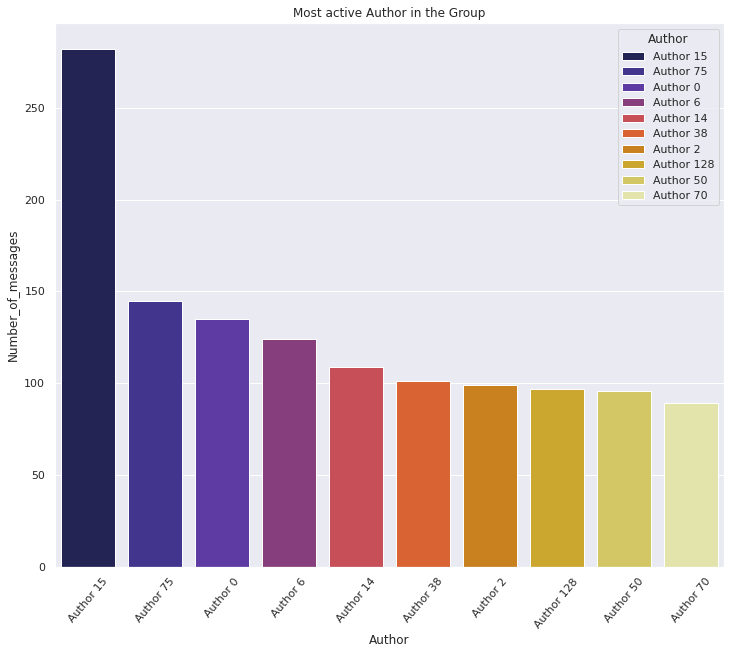

In [37]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.title("Most active Author in the Group")
barplot = sns.barplot(data=author_of_group, x="Author", y="Number_of_messages", hue="Author", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=50, labels=author_of_group.Author)
plt.ylabel("Number_of_messages")
plt.show()

From the chart above, the most active Author in the group is Author 14. The Author might be posting more content everyday.

## **Emoji Used in the Group**

In [43]:
df3 = df1.copy()

emoji_counter = Counter()

emoji_list = list(emoji.UNICODE_EMOJI_ENGLISH.keys())
r = re.compile('|'.join(re.escape(p) for p in emoji_list))
#print(r)
for index, row in df3.iterrows():
    emoji_found = r.findall(row["Message"])
    for emojis in emoji_found:
        emoji_counter[emojis] += 1

In [44]:
emojis_df = pd.DataFrame()
emojis_df['emoji'] = [''] * 5
emojis_df['number_of_Emoji'] = [0] * 5

i = 0
for item in emoji_counter.most_common(5):
    emojis_df.emoji[i] = item[0]
    emojis_df.number_of_Emoji[i] = int(item[1])
    i += 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
emojis_df

,emoji,number_of_Emoji
0,🔥,279
1,🏻,249
2,👏,229
3,💃,203
4,🥰,187


From the dataframe above, emoji Fire is the most used emoji in the group. This shows the group is full of vibes and probably users are enjoying the content being share in the group.

### **EMOJI USED BY THE UNIQUE AUTHORS**

Now we want to know which emoji is  widely used the most by each of the users. But since the first results only create 
We need to create a dataframe contain user and emojio they used.

In [46]:

user_emoji_df = df1.copy()

user_emoji_counter = Counter()
emoji_list = list(emoji.UNICODE_EMOJI_ENGLISH.keys())
r = re.compile('|'.join(re.escape(p) for p in emoji_list))

for index, row in df3.iterrows():
    emoji_found = r.findall(row["Message"])
    for emojis in emoji_found:
        emoji_counter[emojis] += 1



In [47]:
def get_emoji(x):
    c = Counter()
    found = r.findall(x)
    for emoji_found in found:
        c[emoji_found] += 1
    return dict(c)

In [48]:
# creating the feutures for  Number of Messages
user_emoji_df["No.of Emojis"] = user_emoji_df["Message"].apply(lambda x : get_emoji(x))

In [40]:
user_emoji_df.head()

,Date,Time,Author,Message,Emojis,URL
0,2019-03-04,8:42 PM,Author 0,‎‪+234 706 973 3917‬ created this group,,[]
1,2021-03-29,8:30 PM,Author 0,‎You joined using this group's invite link,,[]
2,2021-03-29,8:31 PM,Author 1,Wow Awesome💃💃,💃💃,[]
3,2021-03-29,8:31 PM,Author 1,Evening dear,,[]
4,2021-03-29,8:32 PM,Author 2,"😂😂😂 Forgive ⛑️⛑️⛑️⛑️⛑️ ‎[3/29/21, 8:33:31 PM]...",😂😂😂⛑⛑⛑⛑⛑,[]


From the chart, We can see the emojis by the unique users

### **MORE INSIGHT**
NOw, Let's draw more information by adding month, day to the group

In [130]:
df1.head()

,Date,Time,Author,Message,Emojis,URL
0,2021-03-29,8:31 PM,Author 0,Wow Awesome💃💃,💃💃,[]
1,2021-03-29,8:31 PM,Author 0,Evening dear,,[]
2,2021-03-29,8:32 PM,Author 1,"😂😂😂 Forgive ⛑️⛑️⛑️⛑️⛑️ ‎[3/29/21, 8:33:31 PM]...",😂😂😂⛑⛑⛑⛑⛑,[]
3,2021-03-29,8:34 PM,Author 2,Welcome to this family @2348133241349,,[]
4,2021-03-29,8:48 PM,Author 3,Okay😋,😋,[]


Now, Let's modify our dataframe to get more insights.


In [132]:
df1.head() #To see what i have in the dataframe

,Date,Time,Author,Message,Emojis,URL
0,2021-03-29,8:31 PM,Author 0,Wow Awesome💃💃,💃💃,[]
1,2021-03-29,8:31 PM,Author 0,Evening dear,,[]
2,2021-03-29,8:32 PM,Author 1,"😂😂😂 Forgive ⛑️⛑️⛑️⛑️⛑️ ‎[3/29/21, 8:33:31 PM]...",😂😂😂⛑⛑⛑⛑⛑,[]
3,2021-03-29,8:34 PM,Author 2,Welcome to this family @2348133241349,,[]
4,2021-03-29,8:48 PM,Author 3,Okay😋,😋,[]


In [49]:
# Adding one more column of "Day" for better analysis, here we use datetime library which help us to do this task easily.
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}

In [50]:
#To add  feautures Day to our DataFrame
df1['Day'] = df1['Date'].dt.weekday.map(weeks)
# df1['Number_of_Messages'] = [1]* df1.shape[0]

In [51]:
months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

In [52]:
df1['Month'] = df1['Date'].dt.month.map(months)

In [ ]:
df1.head()

In [58]:
# Rearranging the columns for better understanding
df1 = df1[['Date','Day',"Month",'Time','Author','Message','Emojis','URL']]

In [53]:
df1.head()


,Date,Time,Author,Message,Emojis,URL,Day,Month
0,2019-03-04,8:42 PM,Author 0,‎‪+234 706 973 3917‬ created this group,,[],Monday,Mar
1,2021-03-29,8:30 PM,Author 0,‎You joined using this group's invite link,,[],Monday,Mar
2,2021-03-29,8:31 PM,Author 1,Wow Awesome💃💃,💃💃,[],Monday,Mar
3,2021-03-29,8:31 PM,Author 1,Evening dear,,[],Monday,Mar
4,2021-03-29,8:32 PM,Author 2,"😂😂😂 Forgive ⛑️⛑️⛑️⛑️⛑️ ‎[3/29/21, 8:33:31 PM]...",😂😂😂⛑⛑⛑⛑⛑,[],Monday,Mar


DAY OF THE WEEK WITH TOTAL NUMBER OF MESSSAGES

In [54]:
df1.Day.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [55]:
#to get numbert of messages
df1['Number_of_messages'] = [1]* df1.shape[0]

In [56]:
#To check day of the week with the highest number  of messages
day_of_week = df1.groupby('Day')['Number_of_messages'].count().sort_values(ascending = False).reset_index() 
day_of_week.head()

,Day,Number_of_messages
0,Friday,1295
1,Tuesday,427
2,Monday,218
3,Saturday,210
4,Wednesday,207


In [ ]:
day_of_week.info()

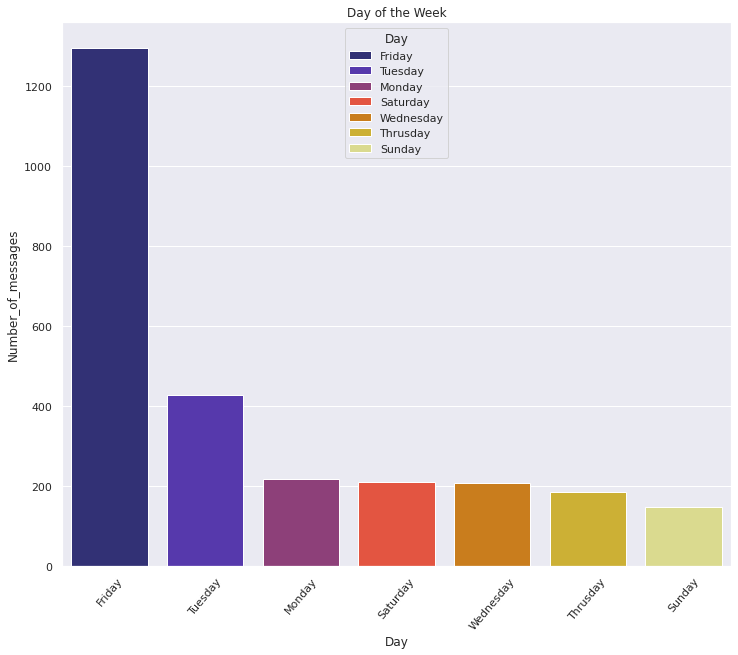

In [72]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.title("Day of the Week")
barplot = sns.barplot(data=day_of_week, x="Day", y="Number_of_messages", hue="Day", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=50, labels=day_of_week.Day)
plt.ylabel("Number_of_messages")
plt.show()

from the chart abov3e, we can see Friday is the most active day of the week. Probably there is always a webinar on Friday

### **TIMELINE OF THE DATA**

We can also check for the timeline, The date the cahart started in the group

In [59]:
start = df1.Date.min() 
end = df1.Date.max()



difference = end-start
print(f"The chat data started from {start} upto {end}")
print(f"which approximately consists of {difference} hours")


The chat data started from 2019-03-04 00:00:00 upto 2021-08-18 00:00:00
which approximately consists of 898 days 00:00:00 hours


In [60]:
df1['Number_of_messages'] = [1]* df1.shape[0]

In [61]:


Time_df = df1.groupby('Time')['Number_of_messages'].count().sort_values(ascending=False).reset_index()
Time_df =Time_df[:10]
Time_df

,Time,Number_of_messages
0,9:24 PM,18
1,8:07 PM,17
2,8:32 PM,15
3,7:32 PM,15
4,9:20 PM,15
5,8:34 PM,14
6,8:50 PM,14
7,8:30 PM,14
8,8:12 PM,14
9,8:43 PM,13


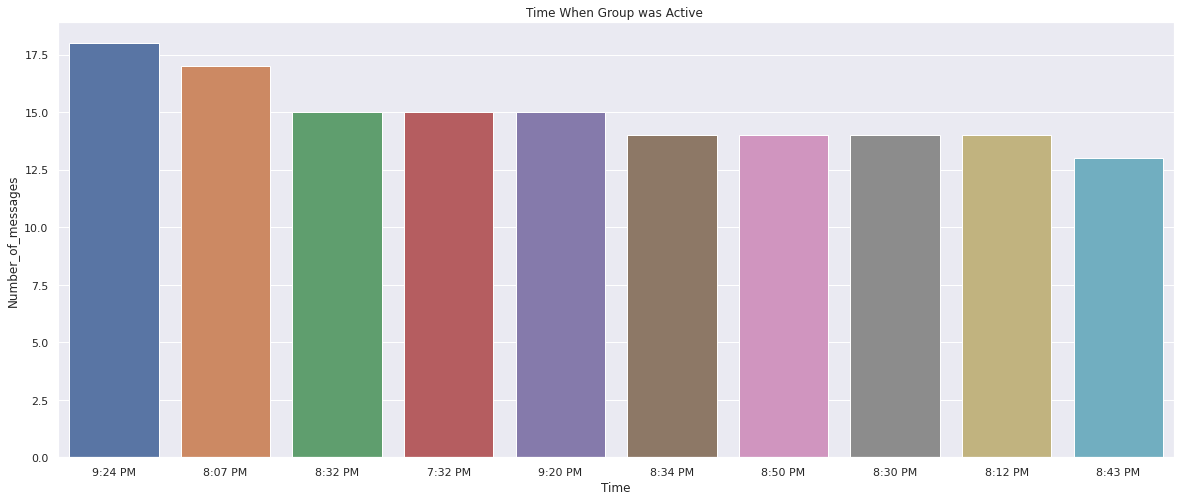

In [71]:
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (20, 8)
sns.set_style("darkgrid")

plt.title('Time When Group was Active ');
time_plot = sns.barplot(x="Time",y="Number_of_messages",data = Time_df, dodge=False)
plt.show()

From the chart above, we can see the group is always active in the night.

### **The Busisest Month in the Group**

In [63]:
df1['Number_of_messages'] = [1]* df1.shape[0]
month_df = df1.groupby('Month')['Number_of_messages'].count().sort_values(ascending = False).reset_index() 
month_df.head()

,Month,Number_of_messages
0,Apr,840
1,Jun,621
2,May,572
3,Jul,470
4,Aug,134


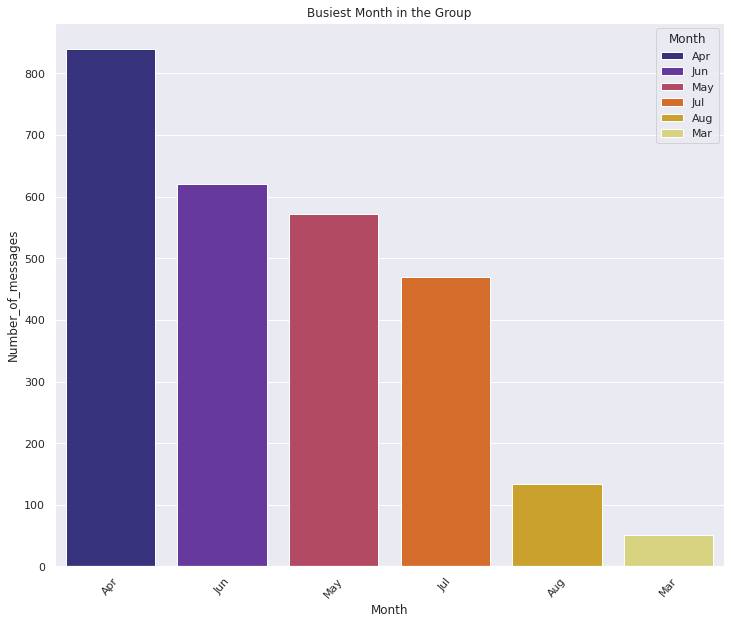

In [70]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.title("Busiest Month in the Group")
barplot = sns.barplot(data=month_df, x="Month", y="Number_of_messages", hue="Month", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=50, labels=month_df.Month)
plt.ylabel("Number_of_messages")
plt.show()

In this analysis, we found that the busiest month is on April the total number of messages had reached around 822, The reason behind it is because on that month, there are lots of webinar and program. This show that the users are very active during that month. 

WordCloud.
It’s time to create a word cloud with all “chat” words, for this we will use WordCloud library.


In [64]:

from wordcloud import WordCloud, STOPWORDS

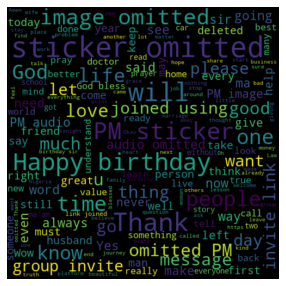

In [66]:
#Each of the word in the message will be review
word = " ".join(review for review in df1.Message)

#Creating a word cloud 
wordcloud = WordCloud(width = 500, height =500 , background_color="black",min_font_size = 10).generate(word)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

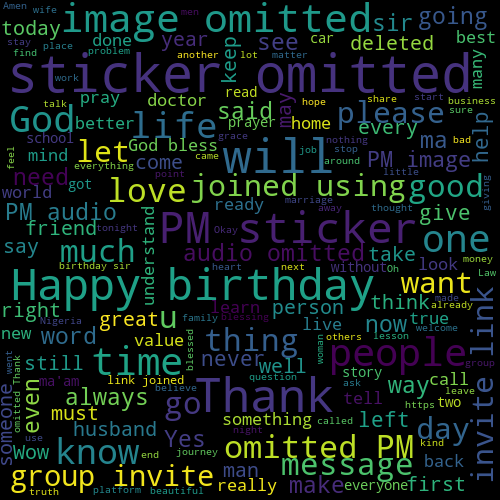

In [67]:
wordcloud.to_image()